# Helper Functions

In [9]:
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    words = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text)]
    return ' '.join(words)

# Load data

In [10]:
import csv

# good data
with open('data/good.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    train_data = []
    train_classif = []
    fields = ['title', 'material']
    # combine text from fields
    for row in csv_reader:
        text = ''
        for field in fields:
            # TODO: preprocessing
            text += row[field]
        train_data.append(preprocess(text.decode('utf8')))
        train_classif.append(1) #hardcoded

# bad data
    train_data.append('Clear Plastic Tote Bag Women Transparent PVC Handbag Zip Purse Stadium Security')
    train_classif.append(0)
        
        

In [11]:
# import csv

# with open('data/good.csv', 'r') as csv_file:
#     train_data = [{k: int(v) for k, v in row.items()} for row in csv.DictReader(csv_file)]
# print train_data[0]

# Bag of words

In [12]:
# count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_data)
train_counts.shape

(81, 335)

# Feature importance 

## Trees

Feature ranking:
1. feature 324 (0.141418)
2. feature 76 (0.135921)
3. feature 298 (0.122740)
4. feature 223 (0.111745)
5. feature 222 (0.111140)
6. feature 133 (0.085100)
7. feature 264 (0.084260)
8. feature 246 (0.072565)
9. feature 332 (0.058023)
10. feature 294 (0.027199)
11. feature 23 (0.018583)
12. feature 210 (0.011814)
13. feature 303 (0.004050)
14. feature 323 (0.002619)
15. feature 145 (0.002059)
16. feature 96 (0.001012)
17. feature 91 (0.000920)
18. feature 55 (0.000919)
19. feature 87 (0.000750)
20. feature 192 (0.000694)
21. feature 71 (0.000686)
22. feature 317 (0.000569)
23. feature 193 (0.000543)
24. feature 253 (0.000541)
25. feature 13 (0.000270)
26. feature 118 (0.000204)
27. feature 15 (0.000203)
28. feature 56 (0.000202)
29. feature 296 (0.000202)
30. feature 186 (0.000169)
31. feature 219 (0.000143)
32. feature 168 (0.000136)
33. feature 263 (0.000135)
34. feature 68 (0.000135)
35. feature 247 (0.000135)
36. feature 86 (0.000135)
37. feature 233 (0.000129)
38. f

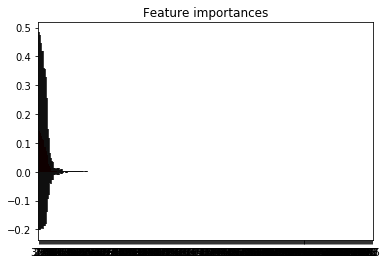

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = train_counts
y = train_classif

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Train classifier and pickle


In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(train_counts, train_classif)

# pickle classifier and count vectorizer
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_model.joblib')
joblib.dump(count_vect, 'count_vect.joblib')

['count_vect.joblib']

# Predict from pickled model

In [17]:
docs_new = ['plastic transparent pvc asdfoijasdf']

# load classifier and count vectorizer from pickle file
classifier = joblib.load('lr_model.joblib')
count_vect = joblib.load('count_vect.joblib')

new_counts = count_vect.transform(docs_new)
predicted = classifier.predict(new_counts)

print predicted

[1]


# Experiments

In [154]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)


In [155]:
len(twenty_train.data)
print twenty_train.data[0]

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



(2257, 35788)